In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import streamlit as st

In [62]:
sns.set(style="whitegrid")

- Importion et visualisation des premières lignes du dataset 

In [63]:
df = pd.read_csv("data/Invistico_Airline.csv")

In [64]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [65]:
print(df.shape)

(129880, 23)


-  Analyser des types de données, détection des valeurs manquantes, des valeurs aberrantes, et identification des
 corrélations entre les variables.

- détection des valeurs manquantes

In [66]:
missing_values = df.isnull().sum()
missing_values

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [67]:
df.isna().sum().sum()

393

Nous avons remarqués la colonne "Arrival Delay in Minutes " comporte 393 valeurs manquantes.
Nous allons utiliser la Median pour imputer les NAN

In [68]:

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [69]:
df.isna().sum().sum()

0

- détection des des valeurs aberrantes

In [70]:
def displayOutliers(data) -> None:
    sns.boxplot(data)
    plt.show()

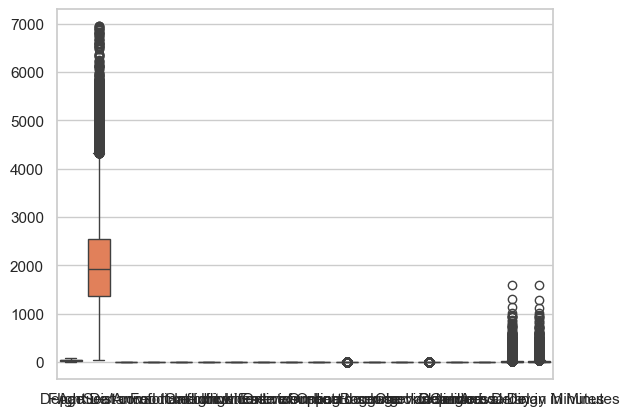

In [71]:
displayOutliers(df)

Comme il y'a la presence de valeurs abérantes, on va les traiter

In [ ]:
def impute_outliers(data): 
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        q1 = np.percentile(data[col].dropna(), 25)
        q3 = np.percentile(data[col].dropna(), 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data 

In [73]:
df = impute_outliers(df)

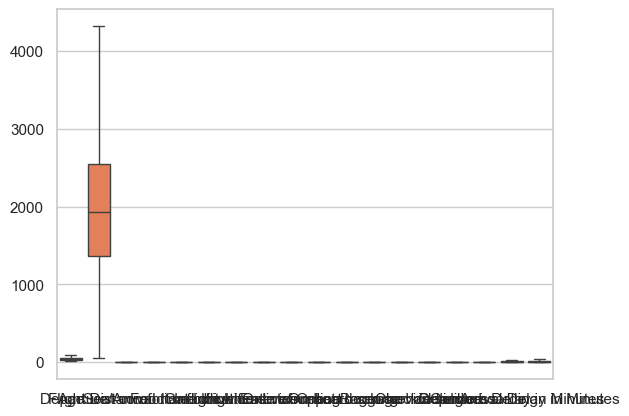

In [74]:
displayOutliers(df)

Suppression des duplication des donnes

In [75]:
df.drop_duplicates()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,30.0,32.5
2,satisfied,Female,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Female,Loyal Customer,60.0,Personal Travel,Eco,623.0,0.0,0.0,0.0,...,3.0,1.0,1.5,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Female,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29.0,Personal Travel,Eco,1731.0,5.0,5.0,5.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
129876,dissatisfied,Male,disloyal Customer,63.0,Personal Travel,Business,2087.0,2.0,3.0,2.0,...,1.0,3.0,2.0,3.0,3.0,1.5,2.0,1.0,30.0,32.5
129877,dissatisfied,Male,disloyal Customer,69.0,Personal Travel,Eco,2320.0,3.0,0.0,3.0,...,2.0,4.0,4.0,3.0,4.0,2.0,3.0,2.0,30.0,32.5
129878,dissatisfied,Male,disloyal Customer,66.0,Personal Travel,Eco,2450.0,3.0,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,30.0,32.5


 identifions les corrélations entre les variables

In [76]:
def heatmaps(df):
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.corr(numeric_only=True).round(2),
            annot = True, 
            cmap = 'viridis', 
            cbar = True, 
            annot_kws = {'fontsize': 10},
            vmin = -1,
            vmax = 1,
            lw = .1,
            # mask = np.tri(np.ones_like(df.corr(numeric_only=False)))
        )
    plt.show()

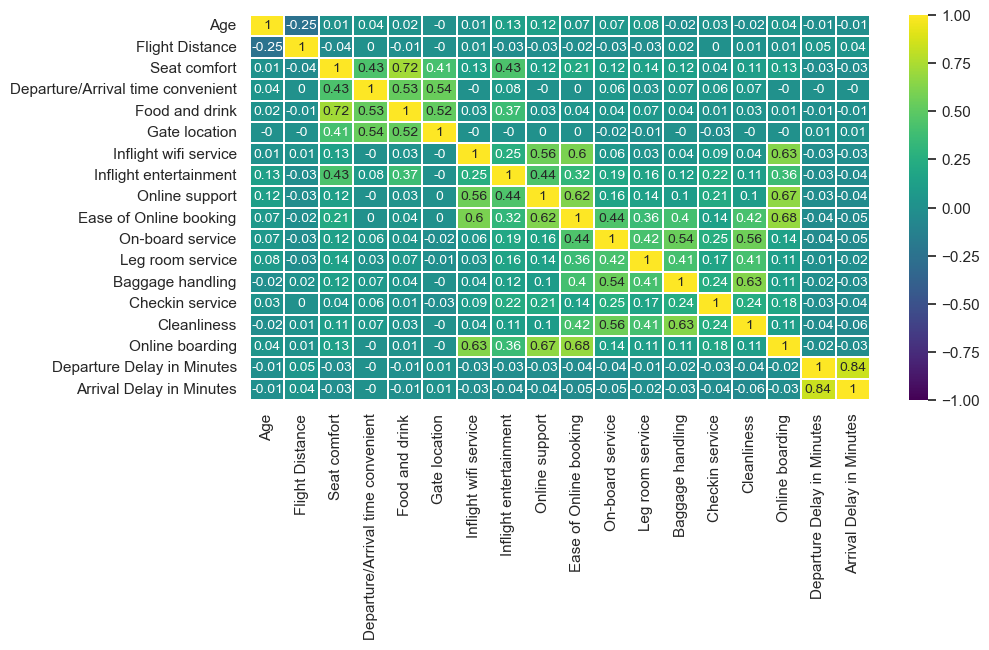

In [77]:
heatmaps(df)

le graphe de correlation montre :
Corrélations fortes :

**Seat comfort** et *Food and drink* ont une corrélation élevée (~0.72), suggérant que le confort des sièges pourrait influencer la satisfaction liée à la nourriture et aux boissons.
Ease of Online booking et Online boarding montrent une forte corrélation (~0.63), indiquant que si les clients trouvent la réservation en ligne facile, ils sont également susceptibles de trouver l'embarquement en ligne pratique.
Departure Delay in Minutes et Arrival Delay in Minutes ont une très forte corrélation (0.84), ce qui est logique, car les retards au départ affectent souvent les retards à l’arrivée.
Corrélations modérées :

Inflight entertainment et Seat comfort présentent une corrélation modérée (~0.43), ce qui signifie que les passagers qui trouvent les divertissements à bord satisfaisants peuvent aussi trouver le confort des sièges acceptable.
Online support et Ease of Online booking montrent une corrélation modérée (~0.62), suggérant que le support en ligne pourrait être perçu comme utile lorsque la réservation en ligne est jugée facile.
Corrélations faibles :

La plupart des autres corrélations sont faibles ou proches de zéro, indiquant peu de relations directes entre ces variables.

- Distribution des données pour les différentes classes (par exemple, satisfaction/nonsatisfaction).

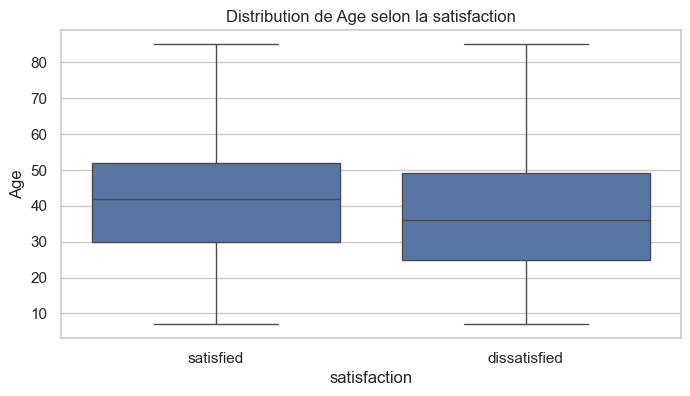

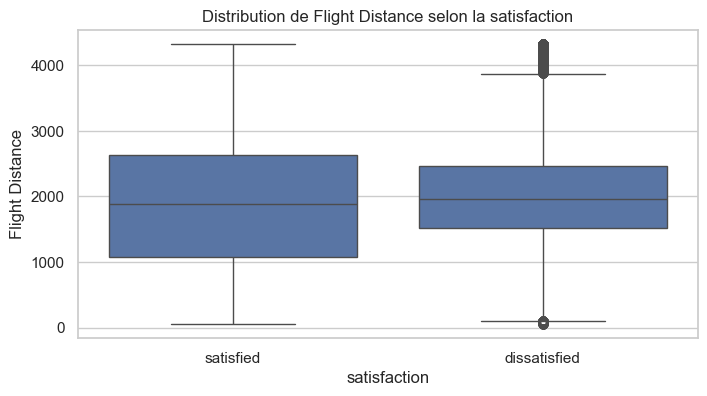

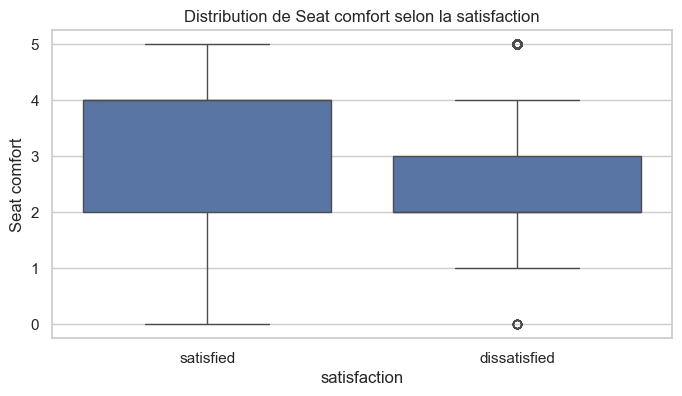

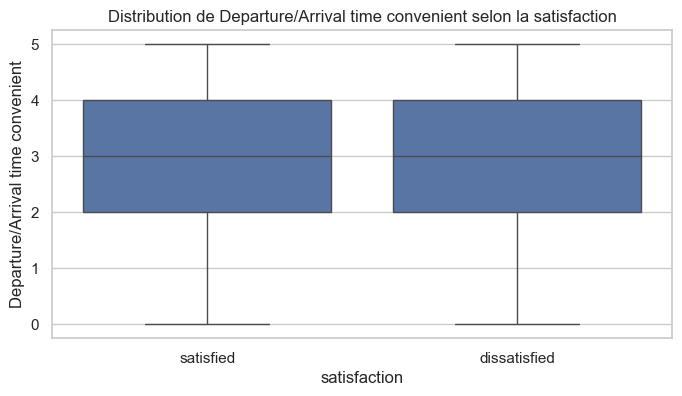

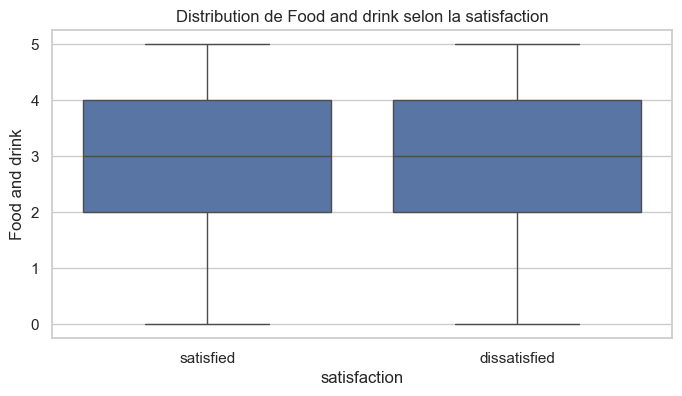

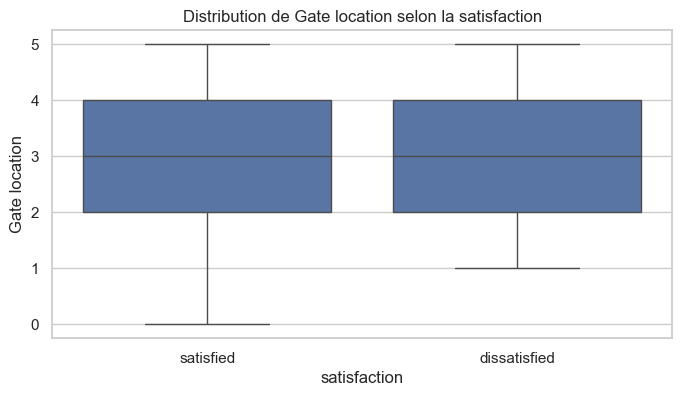

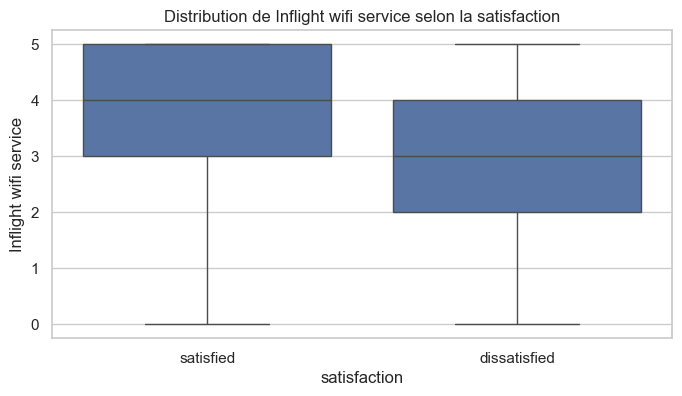

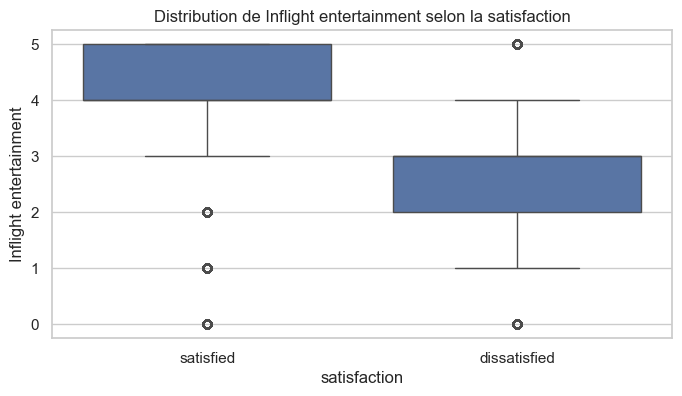

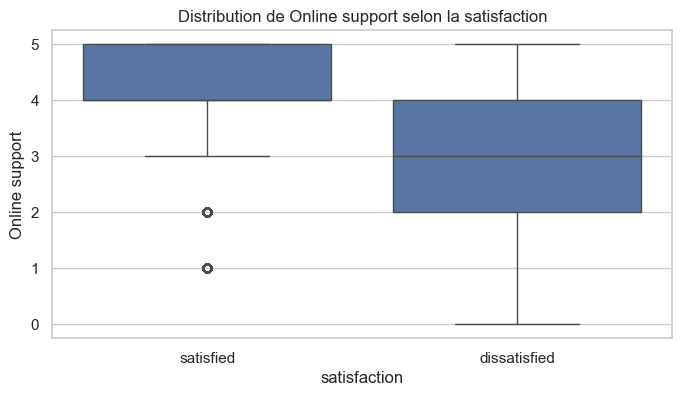

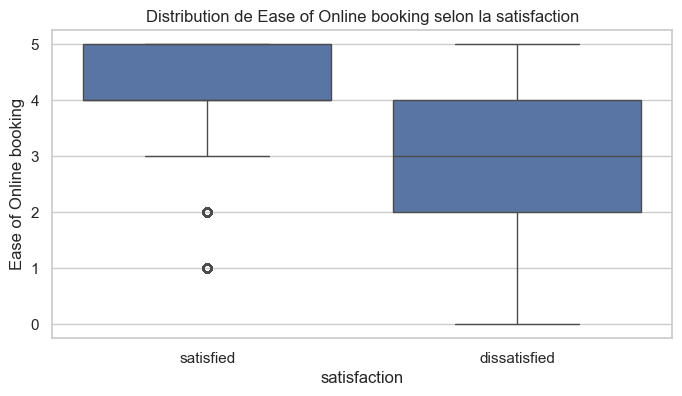

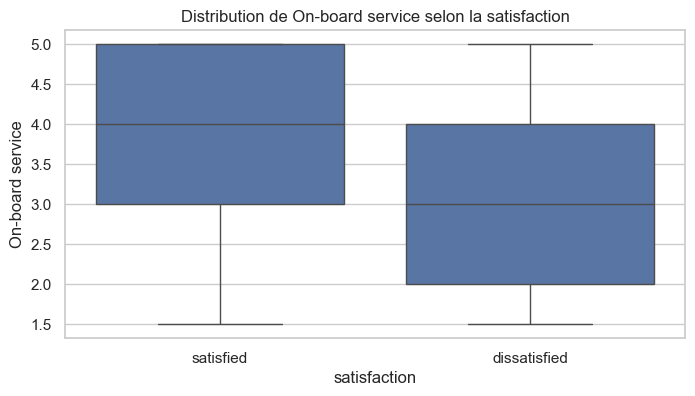

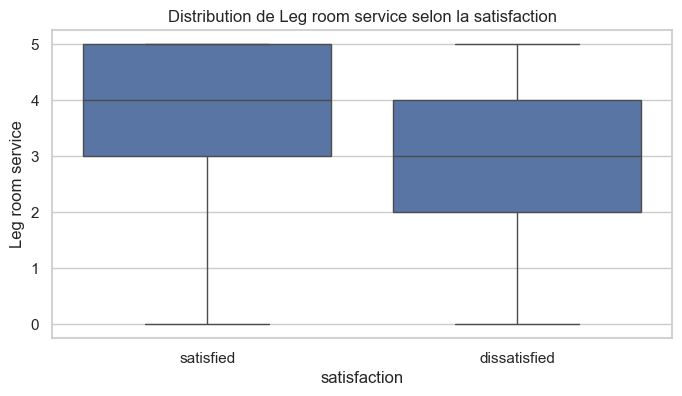

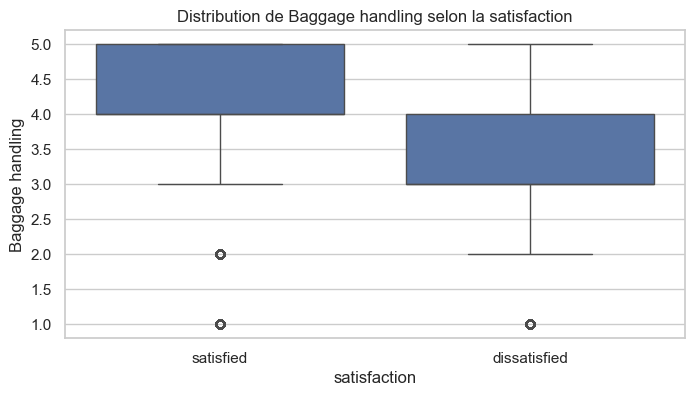

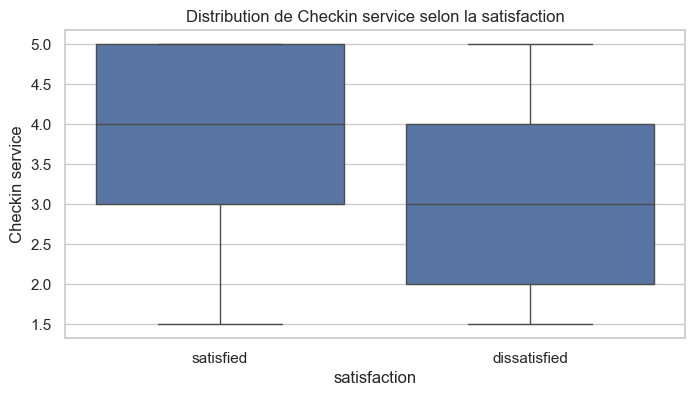

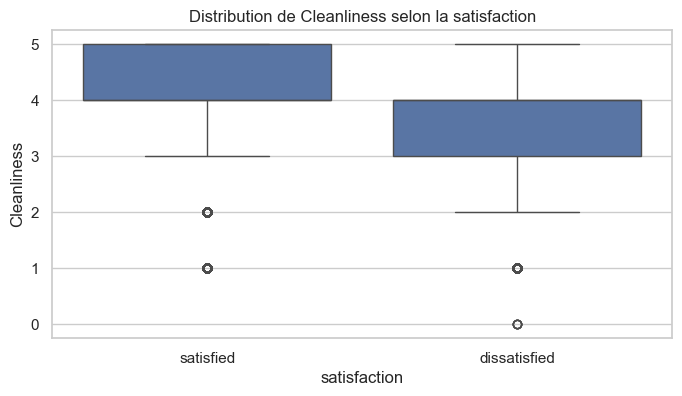

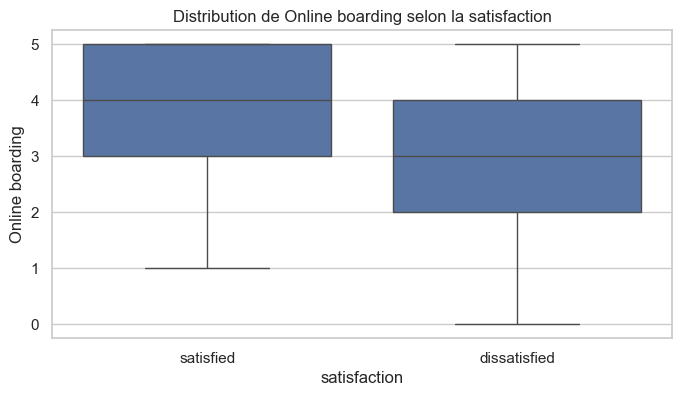

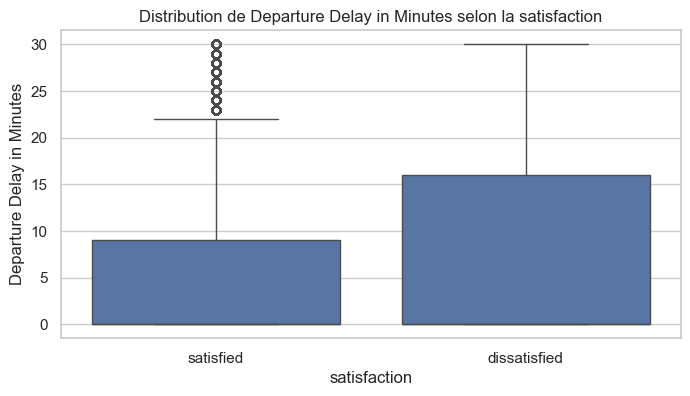

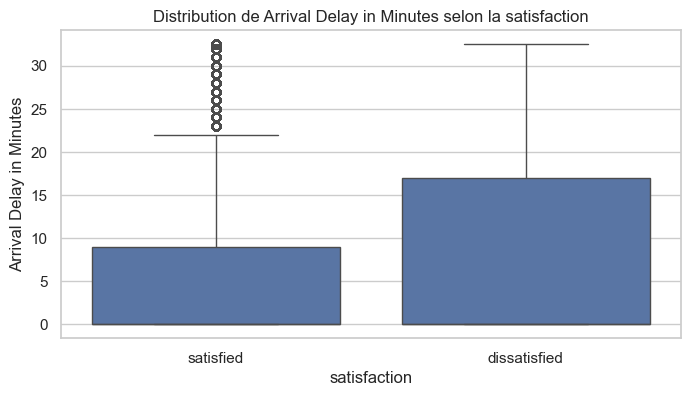

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='satisfaction', y=col, data=df)
    plt.title(f'Distribution de {col} selon la satisfaction')
    plt.show()


###  2. Prétraitement des Données

• Encodage & Standardisation 

In [ ]:
def preprocessing(data):
    """
    Prétraite les données en normalisant les colonnes numériques
    et en encodant les colonnes catégorielles par variables factices.
    
    """
    
    ## I. Prétraitement numérique 
    
    # Normalisation des colonnes numériques
    data_num = data.select_dtypes(include="number")
    scaler = StandardScaler()
    data_num_scaled = scaler.fit_transform(data_num)
    
    # Encodage des colonnes catégorielles
    data_cat = data.select_dtypes(exclude="number")
    encoder = OneHotEncoder(handle_unknown='ignore')
    data_cat_encoded = encoder.fit_transform(data_cat).toarray()
    
    
    data_processed = np.concatenate([data_num_scaled, data_cat_encoded], axis=1)
    
    # Convertir en DataFrame 
    feature_names = np.concatenate([data_num.columns, encoder.get_feature_names_out(data_cat.columns)])
    data_final = pd.DataFrame(data_processed, columns=feature_names)
    
    return data_final

# Application du prétraitement
df = preprocessing(df)


In [121]:
print(df.shape)

(129880, 30)


In [122]:
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,1.691351,-1.713912,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.500820,0.496874,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,-1.615680,0.169127,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.360648,-1.353993,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,2.022054,-1.624435,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### 3. Réduction de Dimensionnalité avec l’ACP

In [ ]:
pca = PCA(n_components=2)
pca.fit(df)  
df_reduce = pca.transform(df)
variance_explained = pca.explained_variance_ratio_.sum()
print(f"Variance expliquée par les 2 premières composantes : {variance_explained:.2f}")

Variance expliquée par les 2 premières composantes : 0.33


L'Analyse en Composantes Principales (ACP) a permis de réduire la dimensionnalité des données en deux composantes principales (PC1 et PC2), tout en expliquant environ 33% de la variance des données (ce qui n'est pas très élevé, donc une analyse plus poussée ou une augmentation du nombre de composantes pourrait être nécessaire).

In [82]:
print(df.columns)

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction_dissatisfied', 'satisfaction_satisfied', 'Gender_Female',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')


In [83]:
#DataFrame pour les données réduites
df_pca = pd.DataFrame(data=df_reduce, columns=['PC1', 'PC2'])
df_pca['satisfaction_dissatisfied'] = df['satisfaction_dissatisfied'].values
df_pca['satisfaction_satisfied'] = df['satisfaction_satisfied'].values


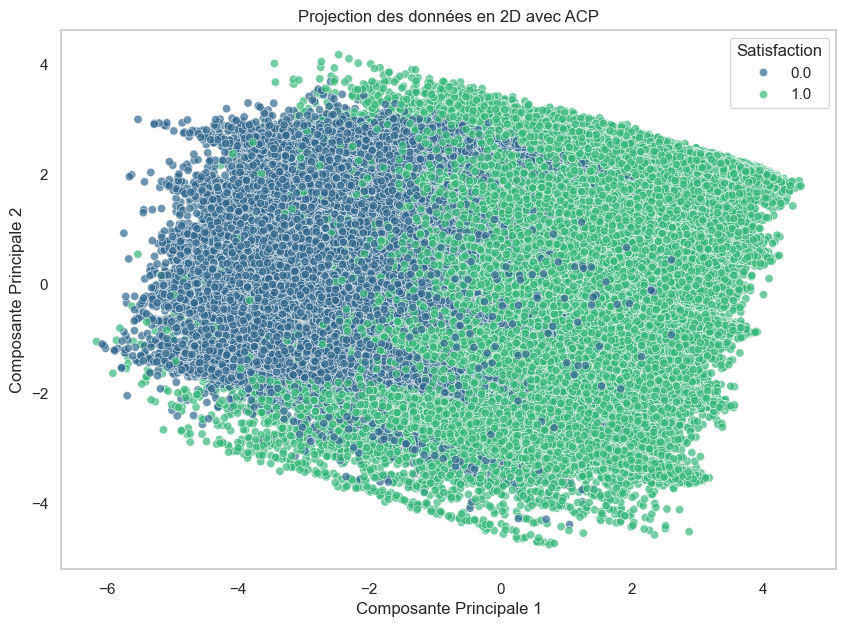

In [84]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='satisfaction_satisfied', palette='viridis', alpha=0.7)
plt.title('Projection des données en 2D avec ACP')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid()
plt.legend(title='Satisfaction')
plt.show()


Le graphique montre une séparation partielle entre les clients satisfaits (en vert) et insatisfaits (en bleu) après réduction de dimension avec l’ACP. Les classes se melange, indiquant qu’il n’est pas possible de les séparer parfaitement avec seulement deux composantes principales. Cela reflète la difficulté du modèle à distinguer complètement les deux groupes, bien que la projection capture une bonne partie de la variabilité des données.

In [85]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, index=df.columns, columns=['PC1', 'PC2'])
print("Chargements des variables :")
print(loading_df)


Chargements des variables :
                                        PC1       PC2
Age                                0.134711  0.001891
Flight Distance                   -0.042433 -0.023885
Seat comfort                       0.437872  0.707318
Departure/Arrival time convenient  0.193473  0.733255
Food and drink                     0.296719  0.833094
Gate location                      0.127440  0.731098
Inflight wifi service              0.548705 -0.176441
Inflight entertainment             0.598068  0.171701
Online support                     0.672078 -0.193157
Ease of Online booking             0.826519 -0.234266
On-board service                   0.579778 -0.142484
Leg room service                   0.490675 -0.086701
Baggage handling                   0.533799 -0.125944
Checkin service                    0.376500 -0.100046
Cleanliness                        0.537549 -0.133962
Online boarding                    0.665916 -0.213755
Departure Delay in Minutes        -0.098070  0.021072


###  4. Modélisation et Prédiction

 - Divisons le dataset en ensemble d’entraînement et de test.

In [87]:
df['satisfaction'] = df['satisfaction_satisfied']
X = df.drop(columns=['satisfaction_dissatisfied', 'satisfaction_satisfied', 'satisfaction'])
y = df['satisfaction']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


- Régression Linéaire 

In [89]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)


LinearRegression()

In [90]:
y_train_pred = model_linreg.predict(X_train)
y_test_pred = model_linreg.predict(X_test)

In [91]:
### Évaluez le modèle en calculant le MSE, le MAE et le coefficient de détermination R2

### MSE

MSE_TR = mean_squared_error(y_train, y_train_pred)
MSE_TE = mean_squared_error(y_test, y_test_pred)

### coefficient de détermination R2
R_TR = r2_score(y_train, y_train_pred)
R_TE = r2_score(y_test, y_test_pred)

In [123]:
MSE_TE

0.12563159638711185

In [124]:
MSE_TR

0.1276942355392491

Les MSE pour les données d'entraînement et de test sont très proches (0.1277 et 0.1256). Cela indique que le modèle ne souffre pas de sous-apprentissage (underfitting) ni de sur-apprentissage (overfitting), car il performe de manière similaire sur les deux ensembles de données.

In [92]:
R_TR

0.48467427826111265

In [93]:
R_TE

0.49265316193181397

Ces resultats montrent que le modèle explique environ 48.5% de la variance des données d'entraînement et environ 49.3% de la variance des données de test. 

- KNN(K-Nearest Neighbors) 

In [94]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
y_pred_knn = knn.predict(X_test)

In [96]:
print(y_pred_knn)

[1. 0. 0. ... 1. 0. 1.]


In [97]:
accuracy_score(y_test, y_pred_knn)

0.9233138281490607

Avec une précision de 92,33%, le modèle KNN est capable de classer correctement 92% des données de test, ce qui est une bonne performance.

In [98]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     11722
         1.0       0.94      0.91      0.93     14254

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



Pour la classe 0.0 (insatisfait) :
Précision : 0.90 (90%) signifie que 90% des prédictions de "insatisfait" sont correctes.
Recall : 0.93 (93%) indique que le modèle détecte 93% des vrais insatisfaits.
F1-Score : 0.92, indiquant un bon équilibre entre la précision et le rappel pour cette classe.
Pour la classe 1.0 (satisfait) :
Précision : 0.94 (94%) montre que le modèle est légèrement plus précis pour identifier les clients satisfaits.
Recall : 0.91 (91%) indique que le modèle détecte 91% des vrais satisfaits.
F1-Score : 0.93, ce qui montre une bonne performance globale pour cette classe aussi.

Les moyennes pondérées et macro pour chaque métrique (précision, rappel, F1-score) sont toutes de 0.92. Cela montre que le modèle est performant de façon uniforme pour chaque classe et ne privilégie pas une classe par rapport à l'autre.

- Naïve Bayes

In [99]:
modelN = GaussianNB()
modelN.fit(X_train, y_train)

GaussianNB()

In [100]:

y_pred_nb = modelN.predict(X_test)

# Évaluer les performances
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81     11722
         1.0       0.85      0.83      0.84     14254

    accuracy                           0.83     25976
   macro avg       0.82      0.83      0.82     25976
weighted avg       0.83      0.83      0.83     25976

Accuracy: 0.83


Le modèle Naïve Bayes présente des résultats globalement bons avec une précision et un rappel assez élevés.
La classe 1.0 (Satisfait) semble être mieux classée que la classe 0.0 (Non-satisfait), avec des scores légèrement plus élevés pour la précision, le rappel et le F1-score.
L'accuracy du modèle est de 83%, ce qui est un bon résultat pour un modèle de classification, mais il est possible d'améliorer encore la performance en optimisant les hyperparamètres ou en utilisant d'autres techniques.

###  5. Évaluation et Optimisation des Modèles

- validation croisée 

In [101]:
cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train,y_train, cv=5).mean()

0.9160186233825144

Nous avons crée une instance du modèle K-Nearest Neighbors (KNN) avec k = 3 voisins.
Nous avons trouvée Un score de 91.6% de précision sur la validation croisée qui montre que le modèle KNN est bien adapté à notre
 problème de classification et est capable de faire des prédictions assez précises.

- Grid Search CV pour l’optimisation des hyperparamètres

Recherche par grille pour optimiser KNN

In [102]:
parm_grid = {
    "metric": ['manhattan', 'euclidean', 'l1'],
    "n_neighbors": range(5,11)
}

In [ ]:
knn1 = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(knn1, parm_grid, cv=3, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean', 'l1'],
                         'n_neighbors': range(5, 11)},
             scoring='accuracy')

In [ ]:
best_param = grid_search.best_params_

In [ ]:
knn1_optimiz = KNeighborsClassifier(n_neighbors=best_param['n_neighbors'])

In [ ]:
knn1_optimiz.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn_optimiz = knn1_optimiz.predict(X_test)

In [ ]:
accuracy_knn_optimized = accuracy_score(y_test, y_pred_knn_optimiz)

In [ ]:
classification_report_knn_optimized = classification_report(y_test, y_pred_knn_optimiz)

print(f"Meilleurs paramètres KNN : {best_param}")
print(f"Accuracy KNN optimisé : {accuracy_knn_optimized:.2f}")
print("Classification Report KNN optimisé :")
print(classification_report_knn_optimized)

Meilleurs paramètres KNN : {'metric': 'manhattan', 'n_neighbors': 7}
Accuracy KNN optimisé : 0.92
Classification Report KNN optimisé :
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     11722
         1.0       0.95      0.91      0.93     14254

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



- Les resultats montrent que metric: 'manhattan' et n_neighbors: 7 ont donné les meilleures performances lors de la validation croisée.
- Accuracy KNN optimisé : 0.92 signifie que le modèle classifie correctement 92% des échantillons du jeu de test.
- Précision de 90% et rappel de 94%, indiquant que le modèle identifie correctement la majorité des clients insatisfaits
- Précision de 95% et rappel de 91%, montrant que le modèle est performant pour détecter les clients satisfaits


1. **Précision Globale** :
   - **KNN** : Précision de **92%** sur le jeu de test, démontrant une bonne capacité de prédiction.
   - **Naïve Bayes** : Précision de **83%**, une performance correcte mais inférieure à celle du KNN.

2. **Analyse des Classes (Insatisfait vs. Satisfait)** :
   - **KNN** :
     - Classe "Insatisfait" : Précision de **90%** et rappel de **94%**, indiquant une bonne détection des clients insatisfaits.
     - Classe "Satisfait" : Précision de **95%** et rappel de **91%**, montrant que le modèle identifie efficacement les clients satisfaits.
   - **Naïve Bayes** :
     - Classe "Insatisfait" : Précision de **80%** et rappel de **82%**.
     - Classe "Satisfait" : Précision de **85%** et rappel de **83%**.
   - **Conclusion des Classes** : Le modèle KNN montre une meilleure performance pour les deux classes par rapport au Naïve Bayes.

3. **Optimisation et Validation Croisée** :
   - KNN a été optimisé avec la métrique de distance "Manhattan" et **7 voisins**, atteignant un score de **91.6%** en validation croisée, ce qui montre une bonne adéquation pour le problème.

4. **Résumé des Performances** :
   - Le modèle **KNN** est le plus performant, avec des scores de précision, de rappel et de F1 supérieurs. Il offre une classification plus précise et équilibrée entre les deux classes, ce qui en fait un meilleur choix pour ce problème.